In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [3]:
train_tweets = pd.read_csv('data\\train_tweets.csv')
test_tweets = pd.read_csv('data\\test_tweets.csv')

In [4]:
train_tweets.head()



,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
# test_tweets = test_tweets['tweet']

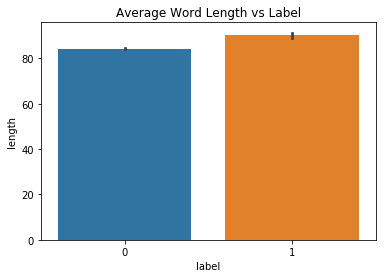

In [6]:
train_tweets['length'] = train_tweets['tweet'].apply(len)
fig1 = sns.barplot('label','length',data = train_tweets)
plt.title('Average Word Length vs Label')
plot = fig1.get_figure()
plot.savefig('Barplot.png')

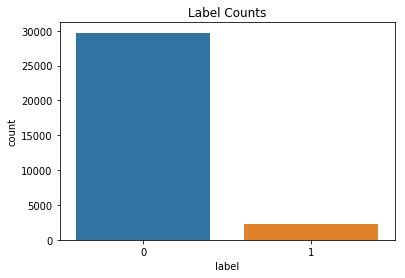

In [7]:
fig2 =sns.countplot(x='label',data = train_tweets)
plt.title('Label Counts')
plot = fig2.get_figure()
plot.savefig('Count plot.png')

PUNCTUATION

In [8]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)


In [9]:
# twp = TextBlob(train_tweets['tweet'][0])
# print(' '.join(twp.words))
# print(train_tweets['tweet'][0])

REMOVING STOPWORDS

In [10]:
def remove_stopwords(tweet):
    tweet_list = [ele for ele in tweet.split() if ele !='user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$',t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word not in stopwords.words('english')]
    return clean_mess

In [11]:
# tweet ="user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run"
# tweet_list = [ele for ele in tweet.split() if ele !='user']
# clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$',t)]
# clean_s = ' '.join(clean_tokens)
# clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]

In [12]:
# print(clean_mess)

NORMALIZATION

In [13]:

def normalization(tweet_list):
    lem = WordNetLemmatizer()
    normalized_tweet = []
    for word in tweet_list.split():
        normalized_text = lem.lemmatize(word,'v')
        normalized_tweet.append(normalized_text)
    return normalized_tweet

In [14]:
# normalization("user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run")

VECTORIZATION AND MODEL SELECTION

To numerically represent the preprocessed data.

In [15]:
def text_processing(tweet):
    
    #Generating the list of words in the tweet (hastags and other punctuations removed)
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)
    
    #Normalizing the words in tweets 
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
    
    return normalization(no_punc_tweet)

In [16]:
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_processing)

In [17]:
test_tweets.head()

,id,tweet,tweet_list
0,31963,#studiolife #aislife #requires #passion #dedic...,"[studiolife, aislife, require, passion, dedica..."
1,31964,@user #white #supremacists want everyone to s...,"[white, supremacists, want, everyone, see, new..."
2,31965,safe ways to heal your #acne!! #altwaystohe...,"[safe, ways, heal, acne, altwaystoheal, health..."
3,31966,is the hp and the cursed child book up for res...,"[hp, curse, child, book, reservations, already..."
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","[bihday, amaze, hilarious, nephew, eli, ahmir,..."


In [18]:
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_processing)

In [20]:
train_tweets.head()

,id,label,tweet,length,tweet_list
0,1,0,@user when a father is dysfunctional and is s...,102,"[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,@user @user thanks for #lyft credit i can't us...,122,"[thank, lyft, credit, ca, use, cause, offer, w..."
2,3,0,bihday your majesty,21,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,86,"[model, love, u, take, u, time]"
4,5,0,factsguide: society now #motivation,39,"[factsguide, society, motivation]"


In [21]:
X = train_tweets['tweet']
y = train_tweets['label']
test = test_tweets['tweet']


In [24]:
msg_train, msg_test, label_train, label_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_processing at 0x000002004B3A2A60>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproce...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [27]:
predictions = pipeline.predict(msg_test)

In [28]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

          0       1.00      0.94      0.97      6315
          1       0.17      1.00      0.29        78

avg / total       0.99      0.94      0.96      6393



In [29]:
print(confusion_matrix(predictions,label_test))

[[5937  378]
 [   0   78]]


In [30]:
print(accuracy_score(predictions,label_test))

0.9408728296574378
